### TUBES PCD 
### KELOMPOK 23

In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math

cv2 untuk pemrosesan gambar, matplotlib.pyplot digunakan untuk membuat visualisasi data termasuk plot gambar hasil pemrosesan, numpy digunakan untuk manipulasi data numerik, pandas untuk manipulasi dan analisis data tabular, os untuk operasi pada sistem operasi dan math untuk fungsi matematika umum

In [54]:
def process_dataset(dataset_dir):
    data = [] 
    labels = []
    paths = []
    
    for sub_folder in os.listdir(dataset_dir):
        sub_folder_files = os.listdir(os.path.join(dataset_dir, sub_folder))
        for i, filename in enumerate(sub_folder_files):
            
            img_path = os.path.join(dataset_dir, sub_folder, filename)
            img = cv2.imread(img_path)
            
            #grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
         

            data.append(gray_img)
            labels.append(sub_folder)
            paths.append(img_path)
    
    labels = np.array(labels)
    paths = np.array(paths)
    
    return data, labels, paths

Code di atas adalah sebuah fungsi bernama process_dataset yang digunakan untuk memproses dataset gambar pada direktori tertentu.

-data = [], labels = [], paths = []: Membuat list kosong data, labels, dan paths untuk menyimpan data gambar, label, dan path gambar.

-for sub_folder in os.listdir(dataset_dir):: Melakukan iterasi pada setiap sub-folder dalam direktori dataset.

-sub_folder_files = os.listdir(os.path.join(dataset_dir, sub_folder)): Mendapatkan daftar file dalam setiap sub-folder.

-for i, filename in enumerate(sub_folder_files):: Melakukan iterasi pada setiap file dalam sub-folder.

-img_path = os.path.join(dataset_dir, sub_folder, filename): Menggabungkan path direktori dengan nama file untuk mendapatkan path lengkap gambar.

-img = cv2.imread(img_path): Membaca gambar menggunakan OpenCV dan menyimpannya dalam variabel img.

-gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY): Mengubah gambar ke dalam mode grayscale dengan menggunakan fungsi cv2.cvtColor() dari OpenCV.

-data.append(gray_img): Menambahkan gambar grayscale ke dalam list data.

-labels.append(sub_folder): Menambahkan label sub-folder ke dalam list labels.

-paths.append(img_path): Menambahkan path gambar ke dalam list paths.

-labels = np.array(labels), paths = np.array(paths): Mengubah list labels dan paths menjadi array numpy untuk kemudahan pengolahan data.

-return data, labels, paths: Mengembalikan data, labels, dan paths sebagai output fungsi.

In [55]:
def resize_images(images, target_size):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, target_size)
        resized_images.append(resized_img)
    return resized_images


Code diatas merupakan fungsi resize_images digunakan untuk meresize (mengubah ukuran) gambar-gambar dalam dataset menjadi ukuran target yang diinginkan. images merupakan list yang berisi gambar-gambar yang akan diresize. target_size adalah ukuran target yang diinginkan untuk gambar-gambar yang akan diresize. resized_images adalah list kosong yang akan menampung gambar-gambar yang telah diresize. Melakukan iterasi pada setiap gambar dalam images menggunakan loop for img in images. Di dalam loop, setiap gambar img diresize menggunakan fungsi cv2.resize(img, target_size). Gambar yang telah diresize disimpan dalam variabel resized_img. Gambar yang telah diresize ditambahkan ke dalam list resized_images menggunakan resized_images.append(resized_img). Setelah semua gambar dalam images telah diresize, list resized_images mengandung gambar-gambar yang telah diresize sesuai dengan ukuran target. Fungsi mengembalikan resized_images sebagai output.

In [56]:
def normalize_images(images):
    normalized_images = []
    for img in images:
        normalized_img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
        normalized_images.append(normalized_img)
    return normalized_images

In [57]:
def thresholding_image(images, treshval):
    thresholded_images = []
    for image in images:
        rows, cols = image.shape
        thresholded = np.zeros([rows, cols])
        thresholded[image > treshval] = 255
        thresholded_images.append(thresholded)
    return thresholded_images

Kode di atas mengimplementasikan fungsi thresholding_image yang digunakan untuk melakukan thresholding pada citra. Fungsi thresholding_image mengambil dua parameter, yaitu images yang merupakan daftar citra yang akan di-threshold, dan treshval yang merupakan nilai ambang threshold yang digunakan. Pada setiap iterasi, fungsi akan memproses satu citra pada images menggunakan perulangan for image in images. Untuk setiap citra, fungsi akan mendapatkan dimensi baris dan kolom menggunakan rows, cols = image.shape. Membuat citra threshold kosong dengan ukuran yang sama dengan citra asli menggunakan thresholded = np.zeros([rows, cols]). Dilakukan thresholding dengan membandingkan setiap piksel pada citra asli dengan nilai ambang threshold. Jika piksel lebih besar dari treshval, maka piksel pada citra threshold akan diatur menjadi 255 (putih), jika tidak maka akan tetap 0 (hitam) menggunakan thresholded[image > treshval] = 255. Citra threshold yang telah diproses ditambahkan ke dalam daftar thresholded_images menggunakan thresholded_images.append(thresholded). Setelah semua citra selesai diproses, daftar thresholded_images berisi citra-citra hasil thresholding dari images akan dikembalikan sebagai output dari fungsi thresholding_image.

In [58]:
def filter_image(image):
   result = []
   for img in image:
      filter = cv2.medianBlur(img, 3)
      result.append(filter)
   return result

Fungsi filter_image pada kode di atas digunakan untuk menerapkan filter atau kernel pada citra atau daftar citra. Filter atau kernel adalah sebuah matriks yang digunakan untuk mengubah atau memodifikasi piksel-piksel dalam suatu citra.

Pada fungsi filter_image, citra-citra yang ingin difilter disediakan dalam bentuk daftar images, dan filter yang ingin digunakan disediakan dalam parameter kernel.

Selanjutnya, dilakukan perulangan untuk setiap citra dalam daftar. Pada setiap iterasi, citra tersebut di-filter menggunakan fungsi filter dengan memasukkan citra dan kernel sebagai argumen. Hasil filter citra disimpan dalam variabel filter_imagex.

Setelah semua citra dalam daftar selesai difilter, citra hasil filter ditambahkan ke dalam daftar filter_images menggunakan filter_images.append(filter_imagex). kemudian hasil filter dikembalikan sebagai output dari fungsi filter_image.

In [59]:
dataset_dir = "jenis_tanah/"
data, labels, paths= process_dataset(dataset_dir)
filter_median= filter_image(data)
resized_data = resize_images(filter_median, (256, 256))
normalized_data = normalize_images(resized_data)
treshed_data = thresholding_image(normalized_data, 100)

variabel dataset_dir ditentukan dengan menunjukkan direktori tempat dataset citra tanah disimpan.

Kemudian, fungsi process_dataset dipanggil dengan menyediakan dataset_dir sebagai argumen. Fungsi ini akan memproses dataset citra tanah dalam direktori tersebut dan mengembalikan data citra, label, dan path citra.

Selanjutnya, citra-citra dalam data (hasil dari fungsi process_dataset) difilter menggunakan fungsi filter_image dengan menggunakan kernel kernelm_3. Citra hasil filter disimpan dalam variabel filter_mean.

Setelah itu, citra-citra dalam filter_mean diubah ukurannya menggunakan fungsi resize_images dengan ukuran target (256, 256). Citra-citra hasil resizing disimpan dalam variabel resized_data.

Citra-citra dalam resized_data kemudian dinormalisasi menggunakan fungsi normalize_images. Normalisasi citra dilakukan untuk mengubah rentang nilai piksel menjadi rentang yang lebih sesuai untuk analisis.

Terakhir, citra-citra dalam normalized_data dikenai thresholding menggunakan fungsi thresholding_image dengan nilai threshold 100. Thresholding digunakan untuk memisahkan piksel-piksel yang melebihi nilai threshold dan mengubahnya menjadi piksel putih (255), sementara piksel-piksel di bawah threshold menjadi piksel hitam (0). Citra-citra hasil thresholding disimpan dalam variabel treshed_data.

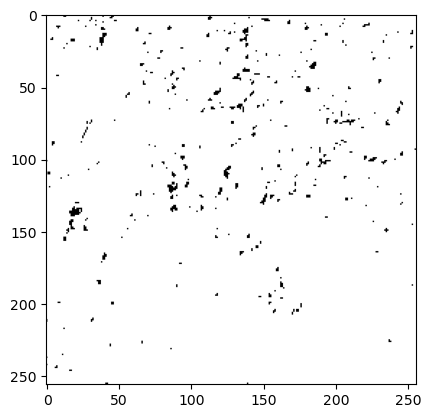

In [60]:
plt.imshow(treshed_data[1], cmap="gray")

kode diatas merupakan kode untuk menampilkan hasil dari normalized_data

# GLCM

In [61]:
def derajat0(data):
    max_val = np.max(data)
    dataTemp = np.zeros([max_val+1, max_val+1], dtype=np.float64)

    for i in range(len(data)):
        for j in range(len(data[i])-1):
            dataTemp[data[i, j], data[i, j+1]] += 1
    
    transpos = np.transpose(dataTemp)
    data = dataTemp + transpos

    temp = np.sum(data)
       
    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= temp
    
    return data

def derajat45(data):
    max_val = np.max(data)
    dataTemp = np.zeros([max_val+1, max_val+1], dtype=np.float64)

    for i in range(len(data)-1):
        for j in range(len(data[i])-1):
            dataTemp[data[i+1, j], data[i, j+1]] += 1
    
    transpos = np.transpose(dataTemp)
    data = dataTemp + transpos
    
    temp = np.sum(data)
    
    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= temp
    return data

def derajat90(data):
    max_val = np.max(data)
    dataTemp = np.zeros([max_val+1, max_val+1], dtype=np.float64)

    for i in range(len(data)-1):
        for j in range(len(data[i])):
            dataTemp[data[i+1, j], data[i, j]] += 1
    
    transpos = np.transpose(dataTemp)
    data = dataTemp + transpos
    
    temp = np.sum(data)
    
    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= temp
    return data

def derajat135(data):
    max_val = np.max(data)
    dataTemp = np.zeros([max_val+1, max_val+1], dtype=np.float64)

    for i in range(len(data)-1):
        for j in range(len(data[i])-1):
            dataTemp[data[i, j], data[i+1, j+1]] += 1
    
    transpos = np.transpose(dataTemp)
    data = dataTemp + transpos
    
    temp = np.sum(data)
    
    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= temp
    return data

Kode di atas adalah implementasi dari empat fungsi yang digunakan untuk menghitung matriks GLCM (Grey-Level Co-occurrence Matrix) pada empat arah yang berbeda (0 derajat, 45 derajat, 90 derajat, dan 135 derajat).

In [62]:
def calculate_contrast(glcm):
    contrast = 0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            contrast += ((i - j) ** 2) * glcm[i, j]
    return contrast

def calculate_dissimilarity(glcm):
    dissimilarity = 0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            dissimilarity += np.abs(i - j) * glcm[i, j]
    return dissimilarity

def calculate_homogeneity(glcm):
    homogeneity = 0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            homogeneity += glcm[i, j] / (1 + np.abs(i - j))
    return homogeneity

def calculate_energy(glcm):
    energy = np.sum(glcm ** 2)
    return energy

def calculate_correlation(glcm):
    rows, cols = glcm.shape
    i_vals, j_vals = np.mgrid[:rows, :cols]
    mean_i = np.sum(i_vals * glcm)
    mean_j = np.sum(j_vals * glcm)
    std_i = np.sqrt(np.sum((i_vals - mean_i) ** 2 * glcm))
    std_j = np.sqrt(np.sum((j_vals - mean_j) ** 2 * glcm))
    correlation = np.sum(((i_vals - mean_i) * (j_vals - mean_j) * glcm) / (std_i * std_j))
    return correlation

def calculated_entrophy(glcm):
    simpan = 0
    for i in range(len(data)):
        for j in range(len(data)):
            if data[i,j] > 0:
                simpan+= -(data[i,j] * math.log(data[i,j]))
    return simpan

def calculated_asm(glcm):
    asm = np.sum(glcm ** 2)
    asm /= np.prod(glcm.shape)  # Normalisasi dengan ukuran matriks
    return asm

Kode di atas merupakan implementasi dari beberapa fungsi untuk menghitung beberapa fitur statistik berdasarkan matriks GLCM (Grey-Level Co-occurrence Matrix):

calculate_contrast: Fungsi ini menghitung kontras GLCM dengan menjumlahkan seluruh elemen dalam matriks GLCM yang telah dikalikan dengan kuadrat perbedaan antara nilai piksel yang berpasangan.

calculate_dissimilarity: Fungsi ini menghitung dissimilarity GLCM dengan menjumlahkan seluruh elemen dalam matriks GLCM yang telah dikalikan dengan perbedaan absolut antara nilai piksel yang berpasangan.

calculate_homogeneity: Fungsi ini menghitung homogeneity GLCM dengan menjumlahkan seluruh elemen dalam matriks GLCM yang telah dibagi oleh 1 ditambah perbedaan absolut antara nilai piksel yang berpasangan.

calculate_energy: Fungsi ini menghitung energy GLCM dengan menjumlahkan kuadrat seluruh elemen dalam matriks GLCM.

calculate_correlation: Fungsi ini menghitung korelasi GLCM dengan menggunakan rumus yang melibatkan perhitungan mean, standard deviation, dan kovariansi dari matriks GLCM.

calculated_entrophy: Fungsi ini menghitung entropi GLCM dengan menjumlahkan seluruh elemen dalam matriks GLCM yang telah dikalikan dengan logaritma natural dari elemen tersebut. Perhitungan ini dilakukan dengan mengabaikan elemen yang bernilai nol.

calculated_asm: Fungsi ini menghitung angular second moment (ASM) GLCM dengan menjumlahkan kuadrat seluruh elemen dalam matriks GLCM dan kemudian membaginya dengan ukuran matriks untuk normalisasi.

In [63]:
def calculate_glcm_features(data, path):
    glcm_0 = derajat0(data)
    glcm_45 = derajat45(data)
    glcm_90 = derajat90(data)
    glcm_135 = derajat135(data)

    contrast_0 = calculate_contrast(glcm_0)
    dissimilarity_0 = calculate_dissimilarity(glcm_0)
    homogeneity_0 = calculate_homogeneity(glcm_0)
    energy_0 = calculate_energy(glcm_0)
    correlation_0 = calculate_correlation(glcm_0)
    entrophy_0 = calculated_entrophy(glcm_0)
    asm_0 = calculated_asm(glcm_0)

    contrast_45 = calculate_contrast(glcm_45)
    dissimilarity_45 = calculate_dissimilarity(glcm_45)
    homogeneity_45 = calculate_homogeneity(glcm_45)
    energy_45 = calculate_energy(glcm_45)
    correlation_45 = calculate_correlation(glcm_45)
    entrophy_45 = calculated_entrophy(glcm_45)
    asm_45 = calculated_asm(glcm_45)

    contrast_90 = calculate_contrast(glcm_90)
    dissimilarity_90 = calculate_dissimilarity(glcm_90)
    homogeneity_90 = calculate_homogeneity(glcm_90)
    energy_90 = calculate_energy(glcm_90)
    correlation_90 = calculate_correlation(glcm_90)
    entrophy_90 = calculated_entrophy(glcm_90)
    asm_90 = calculated_asm(glcm_90)

    contrast_135 = calculate_contrast(glcm_135)
    dissimilarity_135 = calculate_dissimilarity(glcm_135)
    homogeneity_135 = calculate_homogeneity(glcm_135)
    energy_135 = calculate_energy(glcm_135)
    correlation_135 = calculate_correlation(glcm_135)
    entrophy_135 = calculated_entrophy(glcm_135)
    asm_135 = calculated_asm(glcm_135)
    
    
    features = [
        path, contrast_0, dissimilarity_0, homogeneity_0, energy_0, correlation_0, entrophy_0,asm_0,
        contrast_45, dissimilarity_45, homogeneity_45, energy_45, correlation_45, entrophy_45,asm_45,
        contrast_90, dissimilarity_90, homogeneity_90, energy_90, correlation_90, entrophy_90,asm_90,
        contrast_135, dissimilarity_135, homogeneity_135, energy_135, correlation_135, entrophy_135, asm_135
    ]
    
    return features

Kode diatas merupakan Matriks GLCM pada empat sudut (0 derajat, 45 derajat, 90 derajat, 135 derajat) dihitung menggunakan fungsi-fungsi derajat0, derajat45, derajat90, dan derajat135. Masing-masing matriks GLCM ini digunakan untuk menghitung fitur-fitur berikut.

Fitur-fitur yang dihitung meliputi kontras, dissimilarity, homogeneity, energy, korelasi, entropi, dan ASM (angular second moment). Setiap fitur dihitung menggunakan fungsi-fungsi yang telah didefinisikan sebelumnya (seperti calculate_contrast, calculate_dissimilarity, dsb.) dengan matriks GLCM yang sesuai.

Seluruh nilai fitur diambil dan disimpan dalam bentuk daftar (list) dengan urutan yang telah ditentukan. Path gambar juga disertakan sebagai fitur pertama dalam daftar.

In [64]:
features = []
for i, data in enumerate(normalized_data):
    img_features = calculate_glcm_features(data, paths[i])
    features.append(img_features )
    
df = pd.DataFrame(features, columns=['path', 'contrast_0', 'dissimilarity_0', 'homogeneity_0', 'energy_0', 'correlation_0', 'entropy_0','asm_0',
    'contrast_45', 'dissimilarity_45', 'homogeneity_45', 'energy_45', 'correlation_45','entropy_45','asm_45',
    'contrast_90', 'dissimilarity_90', 'homogeneity_90', 'energy_90', 'correlation_90','entropy_95','asm_90',
    'contrast_135', 'dissimilarity_135', 'homogeneity_135', 'energy_135', 'correlation_135', 'entropy_135', 'asm_135'
])

kode diatas Membuat sebuah daftar kosong features untuk menyimpan fitur-fitur dari setiap gambar.

Melakukan iterasi (loop) pada setiap data gambar dan indeksnya menggunakan fungsi enumerate(normalized_data). Di setiap iterasi, dilakukan langkah-langkah berikut:

Memanggil fungsi calculate_glcm_features untuk menghitung fitur-fitur GLCM dari data gambar saat ini dengan menyediakan data gambar dan jalur (path) gambar.
Hasil perhitungan fitur-fitur tersebut disimpan dalam variabel img_features.
Menambahkan img_features ke dalam daftar features.
Setelah selesai melakukan iterasi pada semua data gambar, daftar features memiliki semua fitur-fitur GLCM dari setiap gambar.

Membentuk sebuah data frame menggunakan daftar features sebagai datanya. Kolom-kolom data frame diberi nama sesuai dengan nama fitur-fitur yang dihitung.

Data frame df tersebut berisi semua fitur-fitur GLCM dari setiap gambar, siap untuk digunakan dalam analisis atau pemodelan lebih lanjut.

In [65]:
df['labels'] = labels
df.to_csv(r'glcm_result.csv', index=False)
df

,path,contrast_0,dissimilarity_0,homogeneity_0,energy_0,correlation_0,entropy_0,asm_0,contrast_45,dissimilarity_45,...,entropy_95,asm_90,contrast_135,dissimilarity_135,homogeneity_135,energy_135,correlation_135,entropy_135,asm_135,labels
0,jenis_tanah/kurang subur\pasir-001.jpg,404.685999,14.964706,0.159150,0.000344,0.792057,-5.511811e+07,5.244877e-09,583.984806,18.021407,...,-5.511811e+07,5.421791e-09,756.250242,20.796217,0.120498,0.000259,0.610999,-5.511811e+07,3.956382e-09,kurang subur
1,jenis_tanah/kurang subur\pasir-002.jpg,397.737684,14.697243,0.160085,0.000382,0.768577,-5.831939e+07,5.822941e-09,529.149158,16.981930,...,-5.831939e+07,6.359768e-09,680.839831,19.469896,0.127535,0.000300,0.603334,-5.831939e+07,4.580550e-09,kurang subur
2,jenis_tanah/kurang subur\pasir-003.jpg,553.719792,17.670833,0.139289,0.000317,0.724201,-5.489267e+07,4.833738e-09,786.174979,21.217193,...,-5.489267e+07,4.983489e-09,960.578208,23.678677,0.108329,0.000251,0.521119,-5.489267e+07,3.827865e-09,kurang subur
3,jenis_tanah/kurang subur\pasir-004.jpg,366.786091,13.968903,0.170994,0.000426,0.803619,-5.867574e+07,6.499706e-09,529.102222,16.814548,...,-5.867574e+07,6.763840e-09,659.481030,19.066667,0.133286,0.000322,0.646799,-5.867574e+07,4.916895e-09,kurang subur
4,jenis_tanah/kurang subur\pasir-005.jpg,357.034620,14.044577,0.162988,0.000354,0.772160,-5.913406e+07,5.398336e-09,530.439047,17.235879,...,-5.913406e+07,5.512932e-09,630.332395,19.026282,0.126474,0.000273,0.597663,-5.913406e+07,4.166003e-09,kurang subur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,jenis_tanah/tidak subur\laterit-106.jpg,289.202267,12.302390,0.176796,0.000337,0.858168,-3.459177e+07,5.148044e-09,524.963691,16.856071,...,-3.459177e+07,4.573383e-09,592.184790,17.676586,0.139355,0.000247,0.709148,-3.459177e+07,3.774618e-09,tidak subur
326,jenis_tanah/tidak subur\laterit-107.jpg,1434.572672,27.018689,0.113673,0.000099,0.680568,-2.482255e+07,1.504786e-09,2381.506790,36.211226,...,-2.482255e+07,1.373891e-09,1758.250734,30.832172,0.097651,0.000083,0.608410,-2.482255e+07,1.270040e-09,tidak subur
327,jenis_tanah/tidak subur\laterit-108.jpg,1434.553202,27.017662,0.113623,0.000099,0.680566,-2.482213e+07,1.504566e-09,1757.993695,30.830542,...,-2.482213e+07,1.374003e-09,2381.290811,36.209381,0.085835,0.000071,0.469623,-2.482213e+07,1.087539e-09,tidak subur
328,jenis_tanah/tidak subur\laterit-109.jpg,289.006311,12.304473,0.176466,0.000337,0.858216,-3.459344e+07,5.147885e-09,591.545206,17.667589,...,-3.459344e+07,4.577211e-09,524.861176,16.858900,0.141316,0.000253,0.742127,-3.459344e+07,3.856818e-09,tidak subur


Kode di bawah ini bertujuan untuk menyimpan hasil analisis GLCM (Grey-Level Co-occurrence Matrix) ke dalam file CSV.

Baris pertama df['labels'] = labels digunakan untuk menambahkan kolom baru dengan nama "labels" ke dalam DataFrame df. Kolom ini berisi informasi label yang terkait dengan setiap data citra.

Baris kedua df.to_csv(r'glcm_result.csv', index=False) digunakan untuk menyimpan DataFrame df ke dalam file CSV dengan nama "glcm_result.csv". Fungsi to_csv digunakan untuk mengonversi DataFrame menjadi format CSV dan menyimpannya ke lokasi yang ditentukan.

Baris ketiga df menghasilkan output DataFrame df. Kode ini tidak terkait dengan penyimpanan file CSV, tetapi mungkin digunakan untuk menampilkan DataFrame ke dalam output atau digunakan dalam langkah-langkah selanjutnya dalam program.